<a href="https://colab.research.google.com/github/peiyulin0520/KPMG-virtual-intern-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Task2: get data insight by Data Exploration, Model Development and Interpretation.
---
The datasets provided inlcude Transactions, CustomerDemographic, CustomerAddress, and NewCustomerList.


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#upload data
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [2]:
#load data
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =1, header = 1)
NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =4, header = 1)

<ipython-input-2-c1b227bbac12>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
<ipython-input-2-c1b227bbac12>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)


# Data Preprocessing (Customer data)

Create a variable (purchased_or_not) in Customer dataset to observe whether the customer have made a record in Transactions dataset or not.

In [3]:
# get the list of customer_id in Transactions dataset
id_in_trans = Transactions['customer_id']
# create a boolean varaible (purchased_or_not) in CustomerDemographic dataset
CustomerDemographic['purchased_or_not'] = (CustomerDemographic['customer_id'].isin(id_in_trans))
# CustomerDemographic['purchased_or_not']=CustomerDemographic['purchased_or_not'].\
#                                           replace([True, False], [1, 0])
CustomerDemographic['purchased_or_not'].value_counts()

True     3493
False     507
Name: purchased_or_not, dtype: int64

In [15]:
customer_data = CustomerDemographic.merge(CustomerAddress, how='left', on='customer_id')

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3996
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   last_name                            3872 non-null   object        
 3   gender                               3997 non-null   object        
 4   past_3_years_bike_related_purchases  3997 non-null   int64         
 5   DOB                                  3910 non-null   datetime64[ns]
 6   job_title                            3997 non-null   object        
 7   job_industry_category                3997 non-null   object        
 8   wealth_segment                       3997 non-null   object        
 9   deceased_indicator                   3997 non-null   bool          
 10  default     

[nan, 82.0, 79.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0]


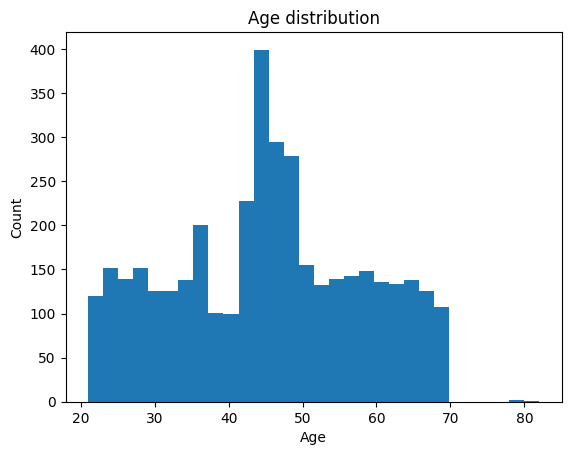

Gender categories:  ['F' 'M' 'U']
wealth_segment:  ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator:  [False  True]
owns_car:  [ True False]


In [194]:
# clean Customer dataset
## copy the original dataset CustomerDemographic
customer_data1 = customer_data.copy()
## DOB: used for Age calculation
### use the datetime package and check the datetime now
from datetime import datetime
now = datetime.now()
### calculate the age
customer_data1['age'] = (now - customer_data1['DOB']).astype('<m8[Y]')

## check age
age_cust = sorted(customer_data1['age'].unique(), reverse=True)
print(age_cust[0:11])
plt.hist(customer_data1['age'], bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## job_title and job_industry_category
### fill NaN data with 'Unknown'
customer_data1['job_industry_category'] = customer_data1['job_industry_category'].fillna('Unknown')
customer_data1['job_title'] = customer_data1['job_title'].fillna('Unknown')

## check the uniqueness for these columns
print('Gender categories: ', customer_data1['gender'].unique())
print('wealth_segment: ', customer_data1['wealth_segment'].unique())
print('deceased_indicator: ', customer_data1['deceased_indicator'].unique())
print('owns_car: ', customer_data1['owns_car'].unique())

## Modify value to make each value representative and in the uniform format
customer_data1['gender'].replace(['Male', 'Female', 'Femal'], ['M', 'F', 'F'], inplace=True)

customer_data1['deceased_indicator'].unique() # N; Y
customer_data['deceased_indicator'].replace(['N', 'Y'], [False,True], inplace=True)

customer_data1['owns_car'].unique() # N; Y
customer_data1['owns_car'].replace(['No', 'Yes'], [False,True], inplace=True)

## Australian Bureau of Statistics: the highest male life expectancy is 82.7 yrs
## the highest female life expectancy is 86.3 yrs
## drop rows that the age exceeds the data shown on the website: 
customer_data1.drop(customer_data1[(customer_data1['age']>82.7)&\
                          (customer_data['gender'] == 'M')].index,\
                          inplace=True)
customer_data1.drop(customer_data1[(customer_data1['age']>86.3)&\
                          (customer_data1['gender'] == 'F')].index,\
                          inplace=True)
# for gender U, I set the life expectancy gate the same as F to keep more data
customer_data1.drop(customer_data1[(customer_data1['age']>86.3)&\
                          (customer_data1['gender'] == 'U')].index,\
                          inplace=True)

## country
customer_data1['country'].unique() # >> 'Australia'
# remove the column since it could not give any insight
customer_data1.drop(columns=['country'], inplace=True)

## state
customer_data1['state'].unique() # >> 'New South Wales', nan, 'QLD', 'VIC', 'NSW', 'Victoria'
customer_data1['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'], inplace=True)
customer_data1['state'].value_counts() # NSW:2137; VIC:1020; QLD: 836
## fill nan value with NSW, which has more counts
customer_data1['state'].fillna('NSW', inplace=True)

## fill NaN in tenure, age and property_valuation with their mean
tenure_mean = customer_data1['tenure'].mean()
age_mean = customer_data1['age'].mean()
property_valuation_mean = customer_data1['property_valuation'].mean()

customer_data1['tenure'].fillna(tenure_mean, inplace=True)
customer_data1['age'].fillna(age_mean, inplace=True)
customer_data1['property_valuation'].fillna(property_valuation_mean, inplace=True)

## drop column that is not useful for classification
customer_data1.drop(columns=['first_name', 'last_name', 'default',\
                                  'DOB', 'job_title', 'address', 'postcode'],\
                     inplace=True)

# transform variables to dummy variables
customer_data2 = customer_data1.copy()
customer_data2 = pd.get_dummies(data=customer_data2,\
                            columns=['gender', 'job_industry_category',\
                                     'wealth_segment', 'state'])


In [195]:
## past_3_years_bike_related_purchases
year3_no = customer_data2.loc[customer_data2['past_3_years_bike_related_purchases'] == 0]
print('\nNumber of customer not purchasing in three years: ',\
      len(year3_no['customer_id'].unique()))

year_all_no = customer_data2.loc[(
    customer_data2['past_3_years_bike_related_purchases'] == 0) &
     (customer_data2['purchased_or_not'] == False)]
print('\nNumber of customer not purchasing in three years and have no',\
      'transaction before: ',len(year_all_no['customer_id'].unique()))

## change the purchase_or_not to False for customer not purchasing in three years
customer_data2.loc[customer_data2['past_3_years_bike_related_purchases'] == 0,\
                         'purchased_or_not'] = False

## check order status
print('order_status','\n', Transactions['order_status'].value_counts()) 
# >> includes 'Approved' 'Cancelled'  
customer_data2_order_status = customer_data2.copy()
Order_status_data = Transactions[['order_status', 'customer_id']]
customer_data2_order_status = customer_data2_order_status.merge(Order_status_data,\
                                                  how='left', on='customer_id')
# if the order is cancelled, it should be 0, otherwise 1
customer_data2_order_status['order_status'].replace(['Approved', 'Cancelled'], [1, 0], inplace=True)
# sum up the order_status for each customer (if sum of the order_status is 0, the purchased_or_not should be False)
customer_data2_order_status['sum_order'] = customer_data2_order_status.groupby('customer_id')['order_status'].transform('sum')
customer_data2_order_status.loc[customer_data2_order_status['sum_order'] == 0 ,\
                                'purchased_or_not'] = False   
customer_data2_order_status1 = customer_data2_order_status[['customer_id', 'purchased_or_not']].drop_duplicates()                                                    


Number of customer not purchasing in three years:  38

Number of customer not purchasing in three years and have no transaction before:  4
order_status 
 Approved     19821
Cancelled      179
Name: order_status, dtype: int64


In [196]:
print(customer_data2['purchased_or_not'].value_counts())
print(customer_data2_order_status1['purchased_or_not'].value_counts())
# >> one customer cancelled order and don't have other transaction records

# place the purchased_or_not to the original one
x = customer_data2_order_status1['purchased_or_not'].tolist()
customer_data2['purchased_or_not'] = x
print('\nAfter: \n', customer_data2['purchased_or_not'].value_counts())

True     3456
False     541
Name: purchased_or_not, dtype: int64
True     3455
False     542
Name: purchased_or_not, dtype: int64

After: 
 True     3455
False     542
Name: purchased_or_not, dtype: int64


# Data Exploration (EDA)

In [197]:
no_purchase_record = customer_data2.loc[customer_data2['past_3_years_bike_related_purchases']==0]
eda = pd.DataFrame({'value':[customer_data2['customer_id'].nunique(),\
                             len(no_purchase_record['customer_id'].unique())]},\
                   index=['The number of customers',\
                      'the number of customers not purchasing in past three years'])


eda.head()

,value
The number of customers,3997
the number of customers not purchasing in past three years,38


# Data Clustering

In [198]:
# remove unused features
clustering_data = customer_data2.copy()
clustering_data.drop(columns=['customer_id'], inplace=True)
print('The number of remained columns: ',len(clustering_data.columns))

The number of remained columns:  26


In [ ]:
#@title
# # check correlation and display outcomes that has high correlation value (0.8)
# all_data_clean3 = all_data_clean2.copy()
# ## get the features which have high correlation
# corr_matrix = all_data_clean3.corr()
# pos_threshold = 0.8
# neg_threshold = -0.8
# combinations = set()

# for i, row in corr_matrix.iterrows():
#   for column, value in row.items():
#     value = row[column]
#     if value >= pos_threshold or value <= neg_threshold:
#       combination = (i, column)
#       combinations.add(combination)

# unique_combinations = set()
# for combination in combinations:
#   if len(combination)> 1 and len(set(combination))==2:
#     sorted_combination = tuple(sorted(combination))
#     reversed_combination = tuple(reversed(sorted_combination))
#     if sorted_combination not in unique_combinations and \
#     reversed_combination not in unique_combinations:
#       unique_combinations.add(sorted_combination)

# print('**********The highly correlated combinations**********')
# for combination in unique_combinations:
#   print(combination, 'correlation value is: ', corr_matrix.loc[combination[0], combination[1]])


# ## correlation plot
# corr = all_data_clean3.corr()
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(all_data_clean3.columns),1)
# ax.set_xticks(ticks)
# plt.xticks(rotation=90)
# ax.set_yticks(ticks)
# ax.set_xticklabels(all_data_clean3.columns)
# ax.set_yticklabels(all_data_clean3.columns)
# plt.hlines(y=np.arange(0, 31)+0.5, xmin=np.full(31, 0)-0.5,\
#            xmax=np.full(31, 31)-0.5, color="black")
# plt.vlines(x=np.arange(0, 31)+0.5, ymin=np.full(31, 0)-0.5,\
#            ymax=np.full(31, 31)-0.5, color="black")
plt.show()

In [ ]:
#@title
# # before clustering, also check multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # drop features for vif
# vif_data = all_data_clean3.drop(columns=['gender_F', 'total_spend'])

# ## remove one variable in each set of dummy variable and target variable: 
# ## wealth_segment_Mass Customer; state_NSW; job_industry_category_Unknown
# vif_data.drop(columns=['wealth_segment_Mass Customer', 'state_NSW', \
#                               'job_industry_category_Unknown',\
#                                'purchased_or_not'], inplace=True)
# ## convert bool type to int to apply vif
# for i in vif_data.columns:
#   if vif_data[i].dtype == bool:
#     vif_data[i] = vif_data[i].astype(int)

# ## get vif
# vif = pd.DataFrame()
# vif['Features'] = vif_data.columns
# vif["VIF"] = [variance_inflation_factor(vif_data.values, i)
#                           for i in range(len(vif_data.columns))]
# print(vif)

In [ ]:
#@title
# from sklearn.preprocessing import StandardScaler
# columns_to_standarized = ['age', 'sum_profit', 'n_transactions', 'profit',\
#                           'tenure', 'list_price', 'property_valuation',\
#                           'past_3_years_bike_related_purchases']
# scaler = StandardScaler()
# scaled_data = vif_data.copy()
# scaled_data[columns_to_standarized] = scaler.fit_transform(scaled_data[columns_to_standarized])

# ## get vif
# vif = pd.DataFrame()
# vif['Features'] = scaled_data.columns
# vif["VIF"] = [variance_inflation_factor(scaled_data.values, i)
#                           for i in range(len(scaled_data.columns))]
# print(vif)

In [ ]:
#@title
# from sklearn.decomposition import PCA
# # reduce the dimensions using PCA
# ## two dimensions
# pca_2 = PCA(n_components=2)
# pca_2_result = pca_2.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066]

# print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
# ## >> Cumulative variance explained by 2 principal components: 35.83%

# ## three dimensions
# pca_3 = PCA(n_components=3)
# pca_3_result = pca_3.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_3.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066 0.13690042]

# print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3.explained_variance_ratio_)))
# ## >> Cumulative variance explained by 3 principal components: 49.52%

# ## four dimensions
# pca_4 = PCA(n_components=4)
# pca_4_result = pca_4.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_4.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066 0.13690042 0.10348373]

# print('Cumulative variance explained by 4 principal components: {:.2%}'.format(np.sum(pca_4.explained_variance_ratio_)))
# ## >> Cumulative variance explained by 4 principal components: 59.86%

# ## five dimensions
# pca_5 = PCA(n_components=5)
# pca_5_result = pca_5.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_5.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066 0.13690042 0.10348373 0.09960829]

# print('Cumulative variance explained by 5 principal components: {:.2%}'.format(np.sum(pca_5.explained_variance_ratio_)))
# ##>> Cumulative variance explained by 5 principal components: 69.82%

In [ ]:
#@title
# # finding important features with the help of PCA
# dataset_pca = pd.DataFrame(abs(pca_5.components_), columns= scaled_data.columns, index = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])
# dataset_pca.head()

In [ ]:
#@title
# from sklearn.cluster import KMeans
# # k means
# sse=[]
# k_list = range(1,31)

# for k in k_list:
#   km = KMeans(n_clusters=k)
#   km.fit(scaled_data)
#   sse.append([k, km.inertia_])

# oca_results_scale = pd.DataFrame({'Cluster': range(1, 31), 'SSE': sse})
# # plt.figure(figsize=(10,10))
# plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker = 'o')
# plt.title('Optimal Number of Clusters using Elbow Method (Scaled data)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

In [ ]:
#@title
# plt.figure(figsize=(12,8))
# plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker = 'o')
# plt.title('Optimal Number of Clusters using Elbow Method (Scaled data)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

In [ ]:
#@title
# from sklearn.metrics import silhouette_samples, silhouette_score
# scaled_data1 = scaled_data.copy()

# kmeans_scale_2 = KMeans(n_clusters = 2, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_3 = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_4 = KMeans(n_clusters = 4, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_5 = KMeans(n_clusters = 5, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_6 = KMeans(n_clusters = 6, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# print('KMeans Scaled Silhouette Score (cluster 2): {}'.format(silhouette_score(scaled_data1, kmeans_scale_2.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 3): {}'.format(silhouette_score(scaled_data1, kmeans_scale_3.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 4): {}'.format(silhouette_score(scaled_data1, kmeans_scale_4.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 5): {}'.format(silhouette_score(scaled_data1, kmeans_scale_5.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 6): {}'.format(silhouette_score(scaled_data1, kmeans_scale_6.labels_, metric='euclidean')))

# labels_scale = kmeans_scale.labels_
# cluster_scale = pd.concat([scaled_data1, pd.DataFrame({'scaled_data1': labels_scale})], axis=1)

**********The highly correlated combinations**********
('gender_F', 'gender_M') correlation value is:  -0.9573226335088968


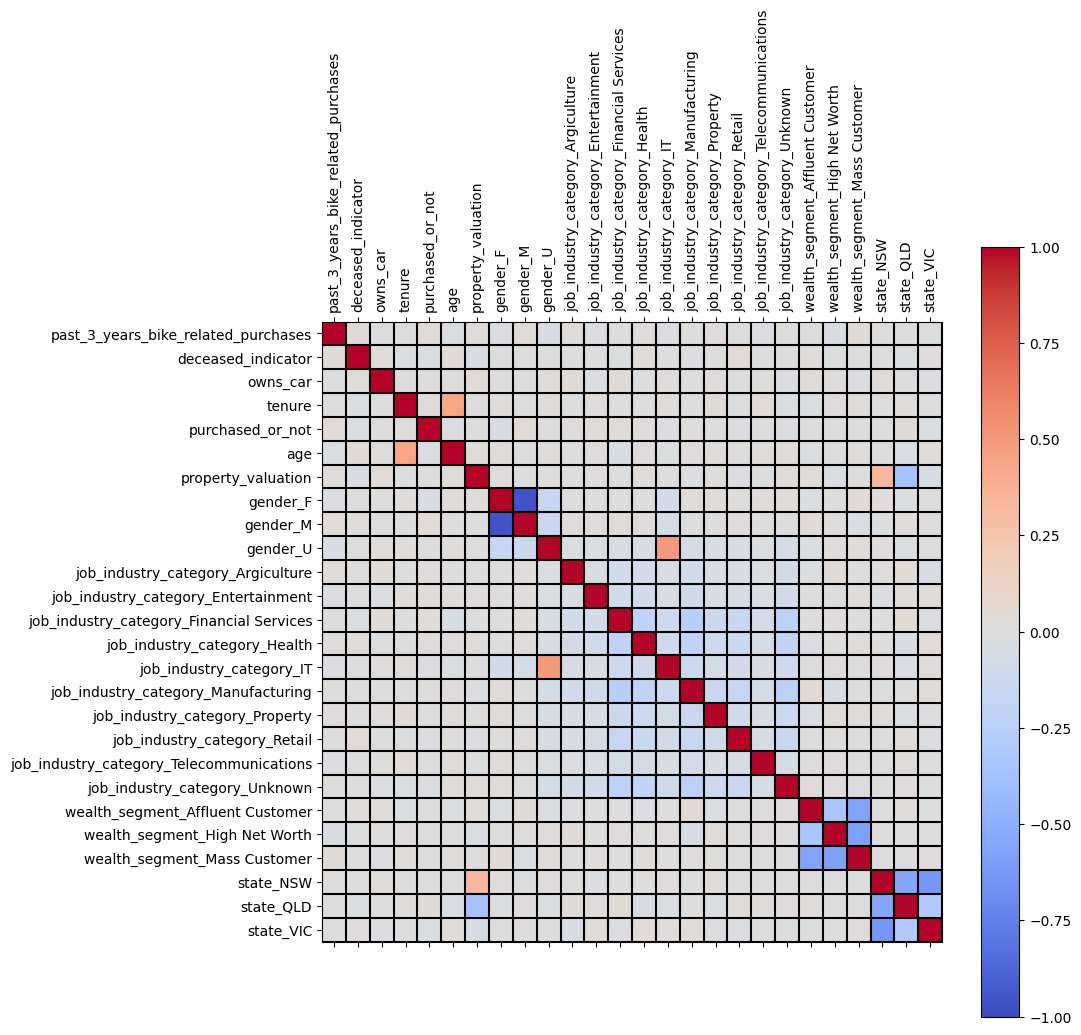

In [199]:
# check correlation and display outcomes that has high correlation value (0.8)
## get the features which have high correlation
corr_matrix = clustering_data.corr()
pos_threshold = 0.8
neg_threshold = -0.8
combinations = set()

for i, row in corr_matrix.iterrows():
  for column, value in row.items():
    value = row[column]
    if value >= pos_threshold or value <= neg_threshold:
      combination = (i, column)
      combinations.add(combination)

unique_combinations = set()
for combination in combinations:
  if len(combination)> 1 and len(set(combination))==2:
    sorted_combination = tuple(sorted(combination))
    reversed_combination = tuple(reversed(sorted_combination))
    if sorted_combination not in unique_combinations and \
    reversed_combination not in unique_combinations:
      unique_combinations.add(sorted_combination)

if len(unique_combinations) != 0:
  for combination in unique_combinations:
    print('**********The highly correlated combinations**********')
    print(combination, 'correlation value is: ', corr_matrix.loc[combination[0], combination[1]])
else:
  print('**********No highly correlated feature**********')


## correlation plot
corr = clustering_data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(clustering_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(clustering_data.columns)
ax.set_yticklabels(clustering_data.columns)
n_col = len(clustering_data.columns)
plt.hlines(y=np.arange(0, n_col)+0.5, xmin=np.full(n_col, 0)-0.5,\
           xmax=np.full(n_col, n_col)-0.5, color="black")
plt.vlines(x=np.arange(0, n_col)+0.5, ymin=np.full(n_col, 0)-0.5,\
           ymax=np.full(n_col, n_col)-0.5, color="black")
plt.show()

In [200]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# reduce the dimensions using PCA
## standarized data
columns_to_standarized = ['age', 'tenure', 'property_valuation',\
                          'past_3_years_bike_related_purchases']
scaler = StandardScaler()
clustering_scaled_data = clustering_data.copy()
clustering_scaled_data.drop(columns=['purchased_or_not'], inplace=True)
clustering_scaled_data[columns_to_standarized] = scaler.fit_transform(clustering_scaled_data[columns_to_standarized])

## two dimensions
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(clustering_scaled_data)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
## >> Explained variation per principal component: [0.2091807  0.15604295 0.14575057]

print('Cumulative variance explained by 2 principal components: {:.2%}\n'.format(np.sum(pca_2.explained_variance_ratio_)))
## >> Cumulative variance explained by 2 principal components: 51.10%

# finding important features with the help of PCA
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns= clustering_scaled_data.columns, index = ['PC_1', 'PC_2'])
print(dataset_pca)

Explained variation per principal component: [0.20916766 0.15604352]
Cumulative variance explained by 2 principal components: 36.52%

      past_3_years_bike_related_purchases  deceased_indicator  owns_car  \
PC_1                             0.064931            0.000079  0.001819   
PC_2                             0.126177            0.000604  0.021675   

        tenure       age  property_valuation  gender_F  gender_M  gender_U  \
PC_1  0.703976  0.706515            0.025050  0.003680  0.003970  0.000290   
PC_2  0.032495  0.005668            0.947801  0.008056  0.008104  0.000048   

      job_industry_category_Argiculture  ...  job_industry_category_Property  \
PC_1                           0.000825  ...                        0.005372   
PC_2                           0.000204  ...                        0.002537   

      job_industry_category_Retail  job_industry_category_Telecommunications  \
PC_1                      0.001631                                  0.002889   
PC_2

In [201]:
dataset_pca.head()

,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,property_valuation,gender_F,gender_M,gender_U,job_industry_category_Argiculture,...,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,state_NSW,state_QLD,state_VIC
PC_1,0.064931,0.000079,0.001819,0.703976,0.706515,0.025050,0.003680,0.003970,0.000290,0.000825,...,0.005372,0.001631,0.002889,0.000256,0.006679,0.004505,0.002174,0.00753,0.009555,0.002025
PC_2,0.126177,0.000604,0.021675,0.032495,0.005668,0.947801,0.008056,0.008104,0.000048,0.000204,...,0.002537,0.005507,0.001627,0.008952,0.010613,0.014700,0.004087,0.22388,0.176083,0.047797


In [203]:
clustering_scaled_data.columns

Index(['past_3_years_bike_related_purchases', 'deceased_indicator', 'owns_car',
       'tenure', 'age', 'property_valuation', 'gender_F', 'gender_M',
       'gender_U', 'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'job_industry_category_Unknown', 'wealth_segment_Affluent Customer',
       'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer',
       'state_NSW', 'state_QLD', 'state_VIC'],
      dtype='object')

In [204]:
# select important feature for further processing for Kmeans clustering
clustering_data_after_pca = clustering_scaled_data[[
    'tenure','age', 'property_valuation']]

In [205]:
# before clustering, conduct VIF to avoid multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

clustering_scaled_data_vif = clustering_scaled_data.copy()
clustering_scaled_data_vif.drop(columns=['gender_F'], inplace=True)
## remove one variable in each set of dummy variable and target variable: 
## wealth_segment_Mass Customer; state_NSW; job_industry_category_Unknown
clustering_scaled_data_vif.drop(columns=['wealth_segment_Mass Customer', 'state_NSW', \
                              'job_industry_category_Unknown'], inplace=True)



## convert bool type to int to apply vif
for i in clustering_scaled_data_vif.columns:
  if clustering_scaled_data_vif[i].dtype == bool:
    clustering_scaled_data_vif[i] = clustering_scaled_data_vif[i].astype(int)

## get vif
vif = pd.DataFrame()
vif['Features'] = clustering_scaled_data_vif.columns
vif["VIF"] = [variance_inflation_factor(clustering_scaled_data_vif.values, i)
                          for i in range(len(clustering_scaled_data_vif.columns))]
print(vif)

## >> no multicollinearity

                                    Features       VIF
0        past_3_years_bike_related_purchases  1.007040
1                         deceased_indicator  1.007185
2                                   owns_car  1.855581
3                                     tenure  1.235682
4                                        age  1.237494
5                         property_valuation  1.171785
6                                   gender_M  1.762756
7                                   gender_U  1.377304
8          job_industry_category_Argiculture  1.077160
9        job_industry_category_Entertainment  1.083443
10  job_industry_category_Financial Services  1.489725
11              job_industry_category_Health  1.353261
12                  job_industry_category_IT  1.487779
13       job_industry_category_Manufacturing  1.467363
14            job_industry_category_Property  1.154835
15              job_industry_category_Retail  1.213984
16  job_industry_category_Telecommunications  1.044246
17        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

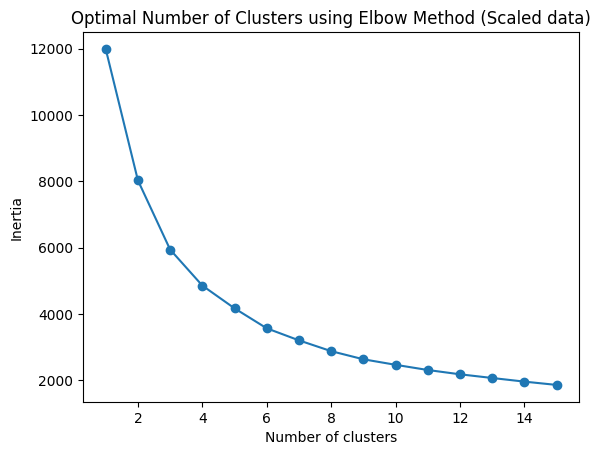

In [206]:
# k means clustering: find the optimal number of clustering first
from sklearn.cluster import KMeans

sse=[]
k_list = range(1,16)

for k in k_list:
  km = KMeans(n_clusters=k)
  km.fit(clustering_data_after_pca)
  sse.append([k, km.inertia_])

oca_results_scale = pd.DataFrame({'Cluster': range(1, 16), 'SSE': sse})
# plt.figure(figsize=(10,10))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker = 'o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [207]:
from sklearn.metrics import silhouette_samples, silhouette_score
scaled_data1 = clustering_data_after_pca.copy()

kmeans_scale_2 = KMeans(n_clusters = 2, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_3 = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_4 = KMeans(n_clusters = 4, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_5 = KMeans(n_clusters = 5, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_6 = KMeans(n_clusters = 6, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_7 = KMeans(n_clusters = 7, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_8 = KMeans(n_clusters = 8, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_9 = KMeans(n_clusters = 9, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_10 = KMeans(n_clusters = 10, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_11 = KMeans(n_clusters = 11, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_12 = KMeans(n_clusters = 12, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_13 = KMeans(n_clusters = 13, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_14 = KMeans(n_clusters = 14, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_15 = KMeans(n_clusters = 15, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)                                                                                                               
print('KMeans Scaled Silhouette Score (cluster 2): {}'.format(silhouette_score(scaled_data1, kmeans_scale_2.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 3): {}'.format(silhouette_score(scaled_data1, kmeans_scale_3.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 4): {}'.format(silhouette_score(scaled_data1, kmeans_scale_4.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 5): {}'.format(silhouette_score(scaled_data1, kmeans_scale_5.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 6): {}'.format(silhouette_score(scaled_data1, kmeans_scale_6.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 7): {}'.format(silhouette_score(scaled_data1, kmeans_scale_7.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 8): {}'.format(silhouette_score(scaled_data1, kmeans_scale_8.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 9): {}'.format(silhouette_score(scaled_data1, kmeans_scale_9.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 10): {}'.format(silhouette_score(scaled_data1, kmeans_scale_10.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 11): {}'.format(silhouette_score(scaled_data1, kmeans_scale_11.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 12): {}'.format(silhouette_score(scaled_data1, kmeans_scale_12.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 12): {}'.format(silhouette_score(scaled_data1, kmeans_scale_13.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 14): {}'.format(silhouette_score(scaled_data1, kmeans_scale_14.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 15): {}'.format(silhouette_score(scaled_data1, kmeans_scale_15.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score (cluster 2): 0.31396384841583064
KMeans Scaled Silhouette Score (cluster 3): 0.3190348106876342
KMeans Scaled Silhouette Score (cluster 4): 0.2938065126515593
KMeans Scaled Silhouette Score (cluster 5): 0.28929882200774243
KMeans Scaled Silhouette Score (cluster 6): 0.29562482309994
KMeans Scaled Silhouette Score (cluster 7): 0.28570539013259444
KMeans Scaled Silhouette Score (cluster 8): 0.28632144635245466
KMeans Scaled Silhouette Score (cluster 9): 0.29160338476933356
KMeans Scaled Silhouette Score (cluster 10): 0.2919108267581992
KMeans Scaled Silhouette Score (cluster 11): 0.28865031696074017
KMeans Scaled Silhouette Score (cluster 12): 0.2731014789469067
KMeans Scaled Silhouette Score (cluster 12): 0.2783265144246546
KMeans Scaled Silhouette Score (cluster 14): 0.2735486038912162
KMeans Scaled Silhouette Score (cluster 15): 0.2687028040900714


Both elbow method and silhouette score show that the number of clusters should be 3.

In [210]:
# Apply K means clustering
optimum_num_cluster = 3
kmeans = KMeans(n_clusters = optimum_num_cluster, random_state=42)
kmeans.fit(clustering_data_after_pca)
cluster_labels = kmeans.labels_

# create a dataframe copy 
customer_data3 = clustering_data.copy()
# assign the cluster labels back to the dataframe with other features
customer_data3['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [211]:
customer_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3996
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       3997 non-null   int64  
 1   deceased_indicator                        3997 non-null   bool   
 2   owns_car                                  3997 non-null   bool   
 3   tenure                                    3997 non-null   float64
 4   purchased_or_not                          3997 non-null   bool   
 5   age                                       3997 non-null   float64
 6   property_valuation                        3997 non-null   float64
 7   gender_F                                  3997 non-null   uint8  
 8   gender_M                                  3997 non-null   uint8  
 9   gender_U                                  3997 non-null   uint8  
 10  job_industry_category_Argiculture   

# Data Modelling

In [212]:
# remove one categories in each group to avoid multicollinearity and also customer_id
customer_data3.drop(columns=['gender_F',\
                             'job_industry_category_Unknown',\
                             'wealth_segment_Mass Customer', 'state_NSW'],\
                           inplace=True)

In [213]:
customer_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3996
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       3997 non-null   int64  
 1   deceased_indicator                        3997 non-null   bool   
 2   owns_car                                  3997 non-null   bool   
 3   tenure                                    3997 non-null   float64
 4   purchased_or_not                          3997 non-null   bool   
 5   age                                       3997 non-null   float64
 6   property_valuation                        3997 non-null   float64
 7   gender_M                                  3997 non-null   uint8  
 8   gender_U                                  3997 non-null   uint8  
 9   job_industry_category_Argiculture         3997 non-null   uint8  
 10  job_industry_category_Entertainment 

In [269]:
# export the dataset
customer_data3.to_csv('customer_data3.csv', encoding = 'utf-8-sig', index=False)
files.download('customer_data3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# read in data
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## upload data
from google.colab import files
uploaded = files.upload()

Saving customer_data3.csv to customer_data3.csv


In [2]:
customer_data3 = pd.read_csv('customer_data3.csv')

# ----all data----

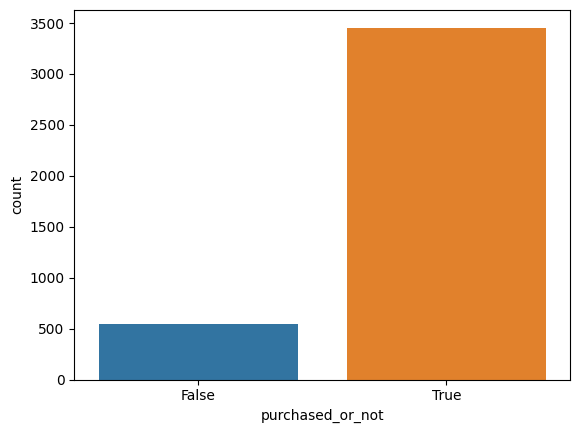

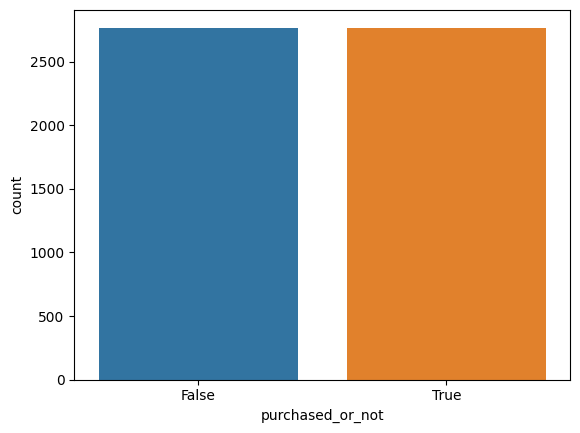

In [3]:
# load required packages
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# over sampling
## view the overall target varaible - purchased_or_not
sns.countplot(x='purchased_or_not', data=customer_data3)
plt.show()
## get the train and test datasets
X = customer_data3.loc[:, customer_data3.columns != 'purchased_or_not']
y = customer_data3.loc[:, customer_data3.columns == 'purchased_or_not']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['purchased_or_not'])

# check whether the data is balanced after oversampling
sns.countplot(x='purchased_or_not', data=os_data_y)
plt.show()



# Logistic Regression

In [4]:
# build a Logistic Regression model
# first time try
# logit_model=sm.Logit(os_data_y,sm.add_constant(os_data_X))
# result=logit_model.fit()
# print(result.summary())
# second time try
# model = LogisticRegression()
# model.fit(os_data_X, os_data_y)
# os_data_X = sm.add_constant(os_data_X)
# logit_model = sm.Logit(os_data_y, os_data_X)
# result = logit_model.fit()
# p_values = result.pvalues

# Logistic Regression model
model_lr = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X, os_data_y)

intercept = model_lr.intercept_
coefficients = model_lr.coef_
print(intercept)
print(coefficients)
# # cross validation:
# logreg = LogisticRegression()
# scores = cross_val_score(logreg, os_data_X, os_data_y, cv=5)
# print('cross-validation scores: ', scores)
# print('mean accuracy: ', scores.mean())
# print('standard deviation: ', scores.std())

[-3.47801442]
[[ 1.71166698e-03 -1.45761354e+00 -6.70600283e-01  3.73313476e-02
   7.50288449e-03  7.57812472e-02  7.74753366e-01  6.57343261e-01
   2.71245189e+00  2.64165836e+00  2.38978968e+00  2.76600893e+00
   2.14693303e+00  2.38882060e+00  2.44177451e+00  2.17515324e+00
   2.42233867e+00  1.08629123e+00  1.05785411e+00  1.19294279e+00
   8.20061653e-01  3.78368840e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# get the accuracy of the model
accuracy_train = model_lr.score(os_data_X,os_data_y)
accuracy_test = model_lr.score(X_test,y_test)
y_pred = model_lr.predict(X_test)
y_scores = model_lr.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred)

print(accuracy_train, accuracy_test)
print(report)

0.8217768147345612 0.76625
              precision    recall  f1-score   support

       False       0.16      0.15      0.15       114
        True       0.86      0.87      0.86       686

    accuracy                           0.77       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.76      0.77      0.76       800



# SVM

In [6]:
# try svm
from sklearn import svm
from sklearn.metrics import accuracy_score
model_svm = svm.SVC(kernel='rbf', probability=True)
model_svm.fit(os_data_X, os_data_y)
y_pred_test = model_svm.predict(X_test)
y_pred_train = model_svm.predict(os_data_X)

accuracy_test_svm = accuracy_score(y_test, y_pred_test)
accuracy_train_svm = accuracy_score(os_data_y, y_pred_train)

print(accuracy_train_svm, accuracy_test_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.602202961357891 0.5925


# Decision Trees

In [7]:
# try decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(os_data_X, os_data_y)
y_pred_dt_test = model_dt.predict(X_test)
y_pred_dt_train = model_dt.predict(os_data_X)

accuracy_test_dt = accuracy_score(y_test, y_pred_dt_test)
accuracy_train_dt = accuracy_score(os_data_y, y_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 0)',\
      accuracy_train_dt, accuracy_test_dt)
# importances = clf.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': os_data_X.columns, \
#                                       'Importance':importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance',\
#                                                           ascending=False)
# print(feature_importance_df)


# info_gain = mutual_info_classif(os_data_X, os_data_y)
# for i, feature in enumerate(os_data_X.columns):
#   print(f'Feature: {feature}, Information Gain:{info_gain[i]}')


The accuracy rate in training dataset and testing dataset (cluster 0) 1.0 0.74125


# ROC

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


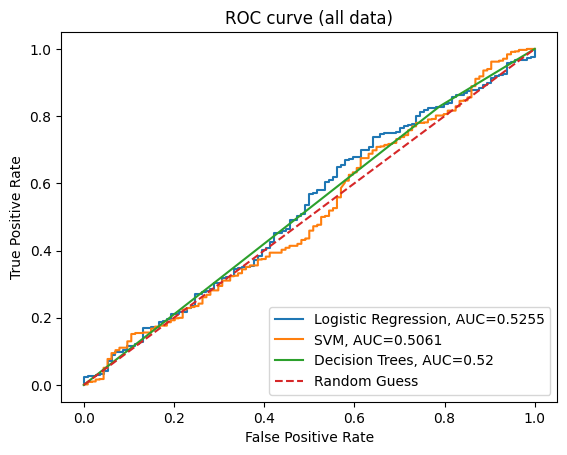

In [8]:
# plot ROC
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr = LogisticRegression(solver='liblinear', \
                              random_state=0).fit(os_data_X, os_data_y)
y_pred_lr = model_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm = model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_svm)
auc = round(metrics.roc_auc_score(y_test, y_pred_svm), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dt)
auc = round(metrics.roc_auc_score(y_test, y_pred_dt), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (all data)')
plt.legend(loc='lower right')

The performance of models is only slightly better than random guess, so I decide to divide data to three sets for data modelling.

# ----divide data to three clusters----

<ipython-input-220-1e00b89138e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0_data.drop(columns=['Cluster'], inplace=True)
<ipython-input-220-1e00b89138e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_data.drop(columns=['Cluster'], inplace=True)
<ipython-input-220-1e00b89138e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2_data.drop(columns=['Cluster'], inplace=True)


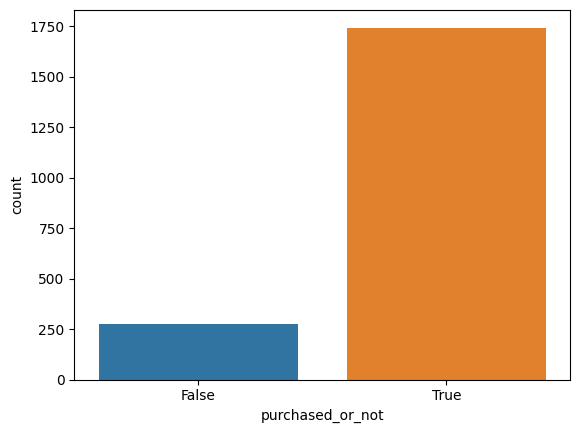

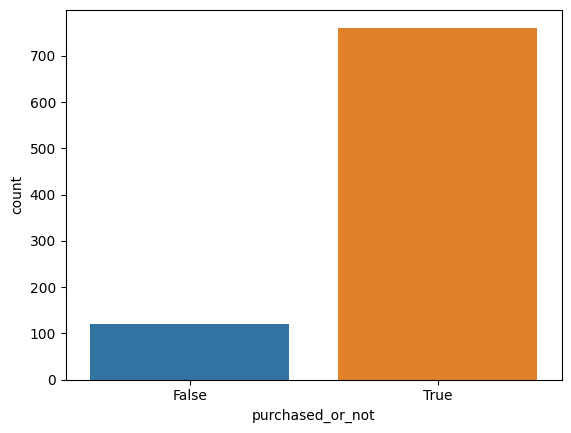

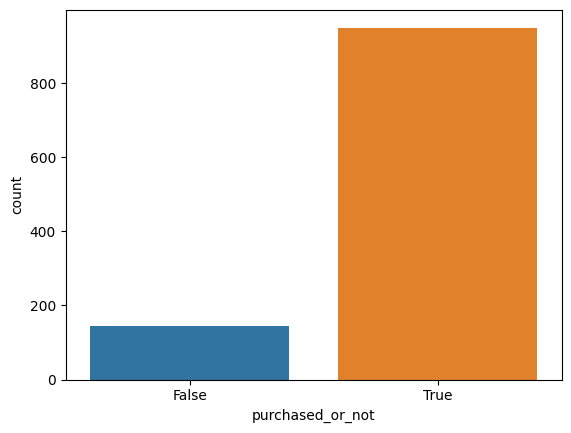

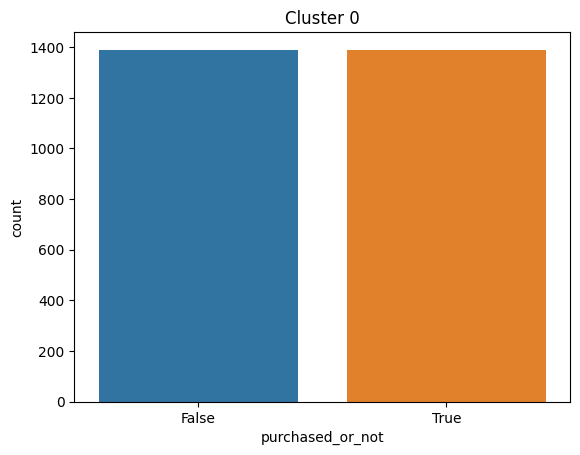

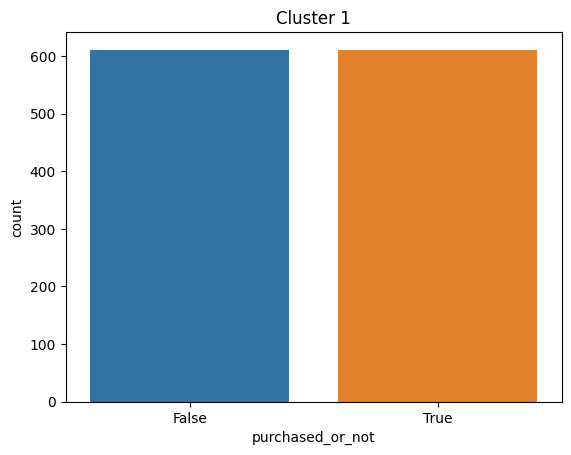

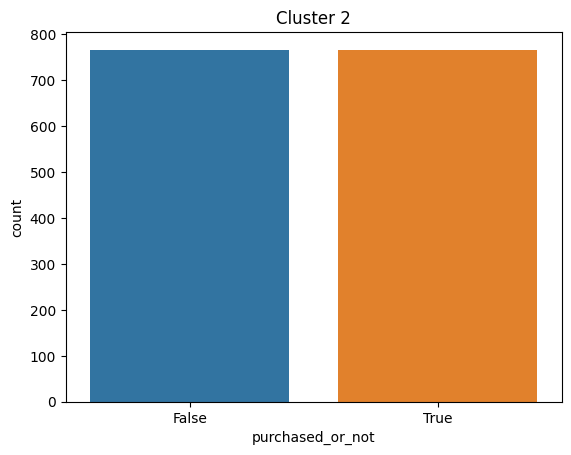

In [220]:
# over sampling
## divide data to three cluster sets
cluster0_data = customer_data3.loc[customer_data3['Cluster'] == 0]
cluster1_data = customer_data3.loc[customer_data3['Cluster'] == 1]
cluster2_data = customer_data3.loc[customer_data3['Cluster'] == 2]

## remove cluster feature
cluster0_data.drop(columns=['Cluster'], inplace=True)
cluster1_data.drop(columns=['Cluster'], inplace=True)
cluster2_data.drop(columns=['Cluster'], inplace=True)

## view the overall target varaible - purchased_or_not
sns.countplot(x='purchased_or_not', data=cluster0_data)
plt.show()

sns.countplot(x='purchased_or_not', data=cluster1_data)
plt.show()

sns.countplot(x='purchased_or_not', data=cluster2_data)
plt.show()

## get the train and test datasets
##(cluster 0)
X0 = cluster0_data.loc[:, cluster0_data.columns != 'purchased_or_not']
y0 = cluster0_data.loc[:, cluster0_data.columns == 'purchased_or_not']
X1 = cluster1_data.loc[:, cluster1_data.columns != 'purchased_or_not']
y1 = cluster1_data.loc[:, cluster1_data.columns == 'purchased_or_not']
X2 = cluster2_data.loc[:, cluster2_data.columns != 'purchased_or_not']
y2 = cluster2_data.loc[:, cluster2_data.columns == 'purchased_or_not']
os = SMOTE(random_state=0)
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

columns = X0_train.columns

os_data_X0,os_data_y0 =os.fit_resample(X0_train, y0_train)
os_data_X0 = pd.DataFrame(data=os_data_X0,columns=columns )
os_data_y0= pd.DataFrame(data=os_data_y0,columns=['purchased_or_not'])

os_data_X1,os_data_y1 =os.fit_resample(X1_train, y1_train)
os_data_X1 = pd.DataFrame(data=os_data_X1,columns=columns )
os_data_y1= pd.DataFrame(data=os_data_y1,columns=['purchased_or_not'])

os_data_X2,os_data_y2 =os.fit_resample(X2_train, y2_train)
os_data_X2 = pd.DataFrame(data=os_data_X2,columns=columns )
os_data_y2 = pd.DataFrame(data=os_data_y2,columns=['purchased_or_not'])

# check whether the data is balanced after oversampling
sns.countplot(x='purchased_or_not', data=os_data_y0)
plt.title('Cluster 0')
plt.show()

sns.countplot(x='purchased_or_not', data=os_data_y1)
plt.title('Cluster 1')
plt.show()

sns.countplot(x='purchased_or_not', data=os_data_y2)
plt.title('Cluster 2')
plt.show()

# Logistic Regression

In [221]:
# build model
print('*****model relevant value*****')
model_lr_c0 = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X0, os_data_y0)

intercept = model_lr_c0.intercept_
coefficients = model_lr_c0.coef_
print('\nClustering 0 intercept: ',intercept)
print('\nClustering 0 coefficients: ', coefficients)

model_lr_c1 = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X1, os_data_y1)

intercept = model_lr_c1.intercept_
coefficients = model_lr_c1.coef_
print('\nClustering 1 intercept: ',intercept)
print('\nClustering 1 coefficients: ',coefficients)

model_lr_c2 = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X2, os_data_y2)

intercept = model_lr_c2.intercept_
coefficients = model_lr_c2.coef_
print('\nClustering 2 intercept', intercept)
print('\nClustering 2 coefficients: ', coefficients)
# # cross validation:
# logreg = LogisticRegression()
# scores = cross_val_score(logreg, os_data_X, os_data_y, cv=5)
# print('cross-validation scores: ', scores)
# print('mean accuracy: ', scores.mean())
# print('standard deviation: ', scores.std())

# get the accuracy of the model
## (cluster 0)
accuracy_train_c0 = model_lr_c0.score(os_data_X0,os_data_y0)
accuracy_test_c0 = model_lr_c0.score(X0_test,y0_test)
y0_pred_lr = model_lr_c0.predict(X0_test)
y0_scores_lr = model_lr_c0.predict_proba(X0_test)[:, 1]
report_c0 = classification_report(y0_test, y0_pred_lr)

print('\n*****cluster 0 metrics*****')
print(accuracy_train_c0, accuracy_test_c0)
print(report_c0)

## (cluster 1)
accuracy_train_c1 = model_lr_c1.score(os_data_X1,os_data_y1)
accuracy_test_c1 = model_lr_c1.score(X1_test,y1_test)
y1_pred_lr = model_lr_c1.predict(X1_test)
y1_scores_lr = model_lr_c1.predict_proba(X1_test)[:, 1]
report_c1 = classification_report(y1_test, y1_pred_lr)

print('\n*****cluster 1 metrics*****')
print(accuracy_train_c1, accuracy_test_c1)
print(report_c1)

## (cluster 2)
accuracy_train_c2 = model_lr_c2.score(os_data_X2,os_data_y2)
accuracy_test_c2 = model_lr_c2.score(X2_test,y2_test)
y2_pred_lr = model_lr_c2.predict(X2_test)
y2_scores = model_lr_c2.predict_proba(X2_test)[:, 1]
report_c2 = classification_report(y2_test, y2_pred_lr)

print('\n*****cluster 2 metrics*****')
print(accuracy_train_c2, accuracy_test_c2)
print(report_c2)

*****model relevant value*****

Clustering 0 intercept:  [-1.62727596]

Clustering 0 coefficients:  [[ 2.83917929e-03  0.00000000e+00 -6.99583156e-01  3.75512333e-03
   7.73311828e-03 -5.63079532e-02  6.74289876e-01  7.86493195e-01
   2.24325714e+00  2.90065083e+00  2.11978894e+00  2.86730511e+00
   1.75414760e+00  2.36418170e+00  2.45173236e+00  1.86620267e+00
   2.11723372e+00  1.05093287e+00  9.62966738e-01  9.52982040e-01
   5.49664117e-01]]

Clustering 1 intercept:  [-1.11617102]

Clustering 1 coefficients:  [[ 1.87341007e-03 -9.12999210e-01 -9.49932408e-01  4.76279578e-02
  -2.36026204e-02 -1.70933205e-02  9.93184275e-01  9.60702408e-01
   2.09048856e+00  1.41422905e+00  2.30057238e+00  1.54965422e+00
   2.28982178e+00  2.03341669e+00  2.61964692e+00  1.85417496e+00
   1.87929631e+00  7.86372319e-01  8.49010572e-01  1.57047737e+00
   8.46858092e-01]]

Clustering 2 intercept [-2.61981839]

Clustering 2 coefficients:  [[ 0.00553068  0.         -0.18373718 -0.05984853  0.00911625  0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# OLS

In [271]:
# # OLS model (Not work)
# os_data_X0_cp = os_data_X0.copy()
# os_data_y0_cp = os_data_y0.copy()

# X_data1 = os_data_X0_cp.copy()
# X_data1 = sm.add_constant(X_data1)
# model_data1 = sm.OLS(os_data_y0_cp, X_data1)
# results_data1 = model_data1.fit()
# print(results_data1.summary())

In [273]:
# # import statsmodels.formula.api as smf
# # build a Logistic Regression model
# # first time try
# logit_model=sm.Logit(os_data_y0_cp,X_data1)
# result=logit_model.fit()
# print(result.summary())

# # second time try
# # model = LogisticRegression()
# # model.fit(os_data_X0_cp, os_data_y0_cp)
# # os_data_X = sm.add_constant(os_data_X)
# df = pd.concat([os_data_X0_cp.reset_index(drop=True),\
#                 os_data_y0_cp.reset_index(drop= True)], axis=1)
# logit_model = smf.logit('purchased_or_not ~ age + tenure + past_3_years_bike_related_purchases', data = df).fit()
# print(logit_model.summary())

# SVM

In [222]:
# try svm
from sklearn import svm
from sklearn.metrics import accuracy_score
model_svm_c0 = svm.SVC(kernel='rbf', probability=True, random_state=0)
model_svm_c0.fit(os_data_X0, os_data_y0)
y0_pred_svm_test = model_svm_c0.predict(X0_test)
y0_pred__svm_train = model_svm_c0.predict(os_data_X0)

accuracy_test_svm_c0 = accuracy_score(y0_test, y0_pred_svm_test)
accuracy_train_svm_c0 = accuracy_score(os_data_y0, y0_pred__svm_train)
print('\n*****cluster 0 accuracy comparison*****')
print(accuracy_train_svm_c0, accuracy_test_svm_c0)

model_svm_c1 = svm.SVC(kernel='rbf', probability=True, random_state=0)
model_svm_c1.fit(os_data_X1, os_data_y1)
y1_pred_svm_test = model_svm_c1.predict(X1_test)
y1_pred_svm_train = model_svm_c1.predict(os_data_X1)

accuracy_test_svm_c1 = accuracy_score(y1_test, y1_pred_svm_test)
accuracy_train_svm_c1 = accuracy_score(os_data_y1, y1_pred_svm_train)
print('\n*****cluster 1 accuracy comparison*****')
print(accuracy_train_svm_c1, accuracy_test_svm_c1)

model_svm_c2 = svm.SVC(kernel='rbf', probability=True, random_state=0)
model_svm_c2.fit(os_data_X2, os_data_y2)
y2_pred_svm_test = model_svm_c2.predict(X2_test)
y2_pred_svm_train = model_svm_c2.predict(os_data_X2)

accuracy_test_svm_c2 = accuracy_score(y2_test, y2_pred_svm_test)
accuracy_train_svm_c2 = accuracy_score(os_data_y2, y2_pred_svm_train)
print('\n*****cluster 2 accuracy comparison*****')
print(accuracy_train_svm_c2, accuracy_test_svm_c2, '\n')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****cluster 0 accuracy comparison*****
0.5737410071942446 0.6419753086419753


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****cluster 1 accuracy comparison*****
0.6292962356792144 0.519774011299435


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****cluster 2 accuracy comparison*****
0.6029986962190352 0.7808219178082192 



# Decision Trees

In [223]:
# try decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

model_dt_c0 = DecisionTreeClassifier(random_state=0)
model_dt_c0.fit(os_data_X0, os_data_y0)
y0_pred_dt_test = model_dt_c0.predict(X0_test)
y0_pred_dt_train = model_dt_c0.predict(os_data_X0)

accuracy_test_dt_c0 = accuracy_score(y0_test, y0_pred_dt_test)
accuracy_train_dt_c0 = accuracy_score(os_data_y0, y0_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 0)',\
      accuracy_train_dt_c0, accuracy_test_dt_c0)

model_dt_c1 = DecisionTreeClassifier(random_state=0)
model_dt_c1.fit(os_data_X1, os_data_y1)
y1_pred_dt_test = model_dt_c1.predict(X1_test)
y1_pred_dt_train = model_dt_c1.predict(os_data_X1)

accuracy_test_dt_c1 = accuracy_score(y1_test, y1_pred_dt_test)
accuracy_train_dt_c1 = accuracy_score(os_data_y1, y1_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 1)',\
      accuracy_train_dt_c1, accuracy_test_dt_c1)

model_dt_c2 = DecisionTreeClassifier(random_state=0)
model_dt_c2.fit(os_data_X2, os_data_y2)
y2_pred_dt_test = model_dt_c2.predict(X2_test)
y2_pred_dt_train = model_dt_c2.predict(os_data_X2)

accuracy_test_dt_c2 = accuracy_score(y2_test, y2_pred_dt_test)
accuracy_train_dt_c2 = accuracy_score(os_data_y2, y2_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 2)',\
      accuracy_train_dt_c2, accuracy_test_dt_c2)
# # information gain for each feature
# importances = model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': os_data_X.columns, \
#                                       'Importance':importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance',\
#                                                           ascending=False)
# print(feature_importance_df)


# info_gain = mutual_info_classif(os_data_X, os_data_y)
# for i, feature in enumerate(os_data_X.columns):
#   print(f'Feature: {feature}, Information Gain:{info_gain[i]}')


The accuracy rate in training dataset and testing dataset (cluster 0) 1.0 0.7111111111111111

The accuracy rate in training dataset and testing dataset (cluster 1) 1.0 0.6666666666666666

The accuracy rate in training dataset and testing dataset (cluster 2) 1.0 0.7488584474885844


# ROC chart (cluster 0)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


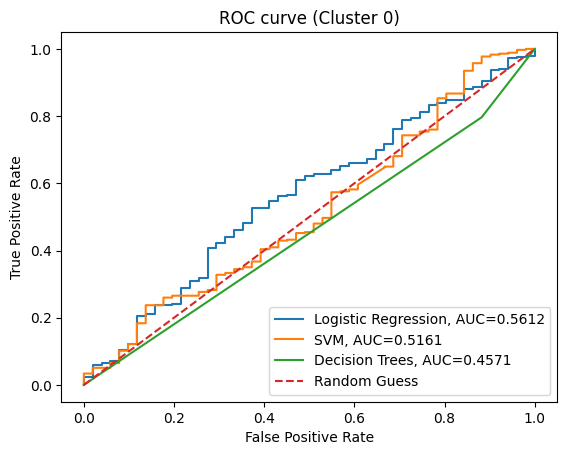

In [224]:
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr_c0 = LogisticRegression(solver='liblinear', \
                                 random_state=0).fit(os_data_X0, os_data_y0)
y_pred_lr_c0 = model_lr_c0.predict_proba(X0_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y0_test, y_pred_lr_c0)
auc = round(metrics.roc_auc_score(y0_test, y_pred_lr_c0), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm_c0 = model_svm_c0.predict_proba(X0_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y0_test, y_pred_svm_c0)
auc = round(metrics.roc_auc_score(y0_test, y_pred_svm_c0), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt_c0 = model_dt_c0.predict_proba(X0_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y0_test, y_pred_dt_c0)
auc = round(metrics.roc_auc_score(y0_test, y_pred_dt_c0), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Cluster 0)')
plt.legend(loc='lower right')

# ROC chart (cluster 1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


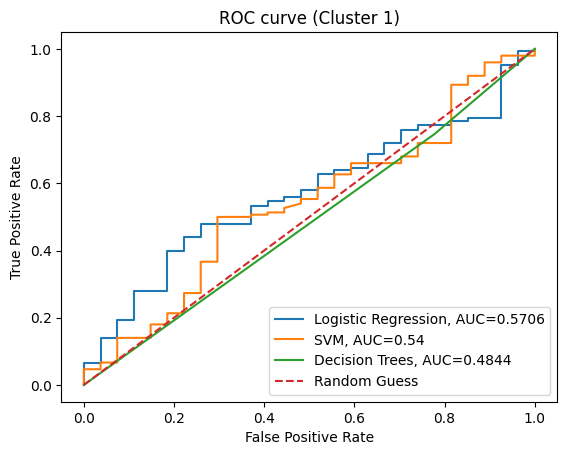

In [225]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr_c1 = LogisticRegression(solver='liblinear', \
                                 random_state=0).fit(os_data_X1, os_data_y1)
y_pred_lr_c1 = model_lr_c1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred_lr_c1)
auc = round(metrics.roc_auc_score(y1_test, y_pred_lr_c1), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm_c1 = model_svm_c1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred_svm_c1)
auc = round(metrics.roc_auc_score(y1_test, y_pred_svm_c1), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt_c1 = model_dt_c1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred_dt_c1)
auc = round(metrics.roc_auc_score(y1_test, y_pred_dt_c1), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Cluster 1)')
plt.legend(loc='lower right')

# ROC chart (cluster 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


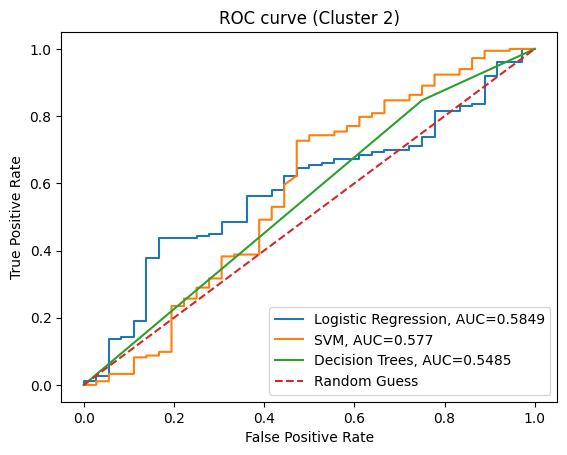

In [226]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr_c2 = LogisticRegression(solver='liblinear', \
                                 random_state=0).fit(os_data_X2, os_data_y2)
y_pred_lr_c2 = model_lr_c2.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y_pred_lr_c2)
auc = round(metrics.roc_auc_score(y2_test, y_pred_lr_c2), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm_c2 = model_svm_c2.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y_pred_svm_c2)
auc = round(metrics.roc_auc_score(y2_test, y_pred_svm_c2), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt_c2 = model_dt_c2.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y_pred_dt_c2)
auc = round(metrics.roc_auc_score(y2_test, y_pred_dt_c2), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Cluster 2)')
plt.legend(loc='lower right')

After comparing three models in each cluster, Logistic Regression has slightly higher accuracy and AUC in all cluster. Also, the accuracy rates between training data and testing data don't have much difference in the both models, meaning the models don't have overfit problem. I decide to use logistic regression for NewCustomerList analysis.

# Gain Chart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

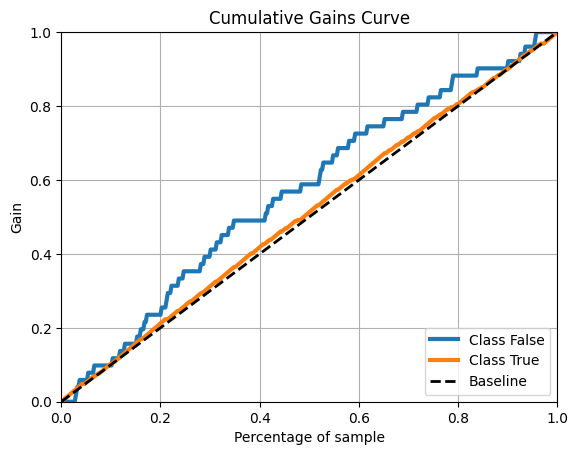

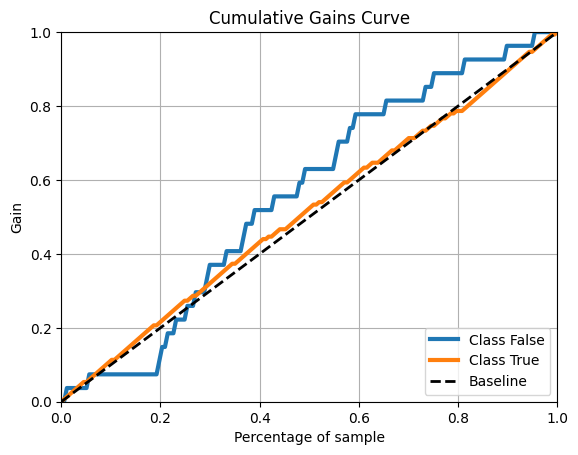

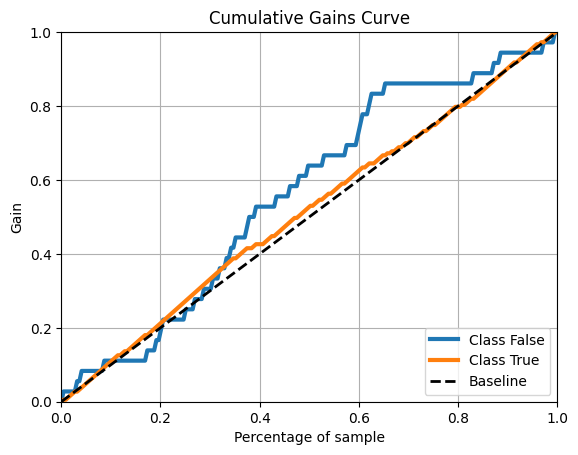

In [227]:
%pip install scikit-plot
import scikitplot as skplt

# LIFT PLOT
lr_c0 = LogisticRegression()
lr_c0 = lr_c0.fit(os_data_X0, os_data_y0)
y_probas = lr_c0.predict_proba(X0_test)
skplt.metrics.plot_cumulative_gain(y0_test, y_probas)

lr_c1 = LogisticRegression()
lr_c1 = lr_c1.fit(os_data_X1, os_data_y1)
y_probas = lr_c1.predict_proba(X1_test)
skplt.metrics.plot_cumulative_gain(y1_test, y_probas)

lr_c2 = LogisticRegression()
lr_c2 = lr_c2.fit(os_data_X2, os_data_y2)
y_probas = lr_c2.predict_proba(X2_test)
skplt.metrics.plot_cumulative_gain(y2_test, y_probas)
plt.show()


False class has slightly stronger predict performance after gaining over 20% of sample than random guess.

# Predict: NewCustomerList dataset 

In [228]:
# Preprocess the dataset
NewCustomerList1 = NewCustomerList.copy()

# remove variables
NewCustomerList1.drop(columns=['first_name', 'last_name', 'job_title', 'address',\
                               'postcode', 'country', 'Unnamed: 16',\
                               'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',\
                               'Unnamed: 20', 'Rank', 'Value'], inplace=True)
# calculate the age
NewCustomerList1['age'] = (now - NewCustomerList1['DOB']).astype('<m8[Y]')
# remove DOB
NewCustomerList1.drop(columns=['DOB'], inplace=True)
# deceased_indicator; owns_car; gender
NewCustomerList1['deceased_indicator'].unique()
NewCustomerList1['deceased_indicator'].replace(['N', 'Y'], [0,1], inplace=True)

NewCustomerList1['owns_car'].unique()
NewCustomerList1['owns_car'].replace(['No', 'Yes'], [0,1], inplace=True)

NewCustomerList1['gender'].unique()
NewCustomerList1['gender'].replace(['Male', 'Female'], ['M','F'], inplace=True)


# filling missing value with mean
NewCustomerList1['job_industry_category'].fillna('Unknown', inplace=True)
NewCustomerList1['age'].fillna(NewCustomerList1['age'].mean(), inplace=True)

In [229]:
NewCustomerList1.info() # ensure no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   job_industry_category                1000 non-null   object 
 3   wealth_segment                       1000 non-null   object 
 4   deceased_indicator                   1000 non-null   int64  
 5   owns_car                             1000 non-null   int64  
 6   tenure                               1000 non-null   int64  
 7   state                                1000 non-null   object 
 8   property_valuation                   1000 non-null   int64  
 9   purchase_or_not                      1000 non-null   bool   
 10  age                                  1000 non-null   float64
dtypes: bool(1), float64(1), int64(5

In [230]:
# create dummy variables
NewCustomerList1 = pd.get_dummies(data=NewCustomerList1, columns=['gender', \
                                  'job_industry_category','wealth_segment', \
                                  'state'])
# drop variables not used in the model
NewCustomerList1.drop(columns=['job_industry_category_Unknown', 'gender_F',\
                              'wealth_segment_Mass Customer', 'state_NSW'], inplace=True)

In [231]:
# subset data to get cluster from the kmean
NewCustomerList2 = NewCustomerList1[['tenure','age', 'property_valuation']]
# Assign new data points to existing clusters
# assign the cluster labels back to the dataframe with other features
kmeans.fit(NewCustomerList2)
cluster_labels = kmeans.labels_
NewCustomerList1['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [232]:
NewCustomerList1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       1000 non-null   int64  
 1   deceased_indicator                        1000 non-null   int64  
 2   owns_car                                  1000 non-null   int64  
 3   tenure                                    1000 non-null   int64  
 4   property_valuation                        1000 non-null   int64  
 5   purchase_or_not                           1000 non-null   bool   
 6   age                                       1000 non-null   float64
 7   gender_M                                  1000 non-null   uint8  
 8   gender_U                                  1000 non-null   uint8  
 9   job_industry_category_Argiculture         1000 non-null   uint8  
 10  job_industry_category_Entertainment  

# Predict Purchase Decisions using model

In [233]:
# reorder the variable to fit the order in the model 
NewCustomerList3 = NewCustomerList1[['past_3_years_bike_related_purchases', \
                                     'deceased_indicator', 'owns_car',\
                                     'tenure', 'age','property_valuation', \
                                     'gender_M', 'gender_U',\
                                     'job_industry_category_Argiculture',\
                                     'job_industry_category_Entertainment', \
                                     'job_industry_category_Financial Services',\
                                     'job_industry_category_Health',\
                                     'job_industry_category_IT', \
                                     'job_industry_category_Manufacturing',\
                                     'job_industry_category_Property',\
                                     'job_industry_category_Retail',\
                                     'job_industry_category_Telecommunications',\
                                     'wealth_segment_Affluent Customer',\
                                     'wealth_segment_High Net Worth','state_QLD',\
                                     'state_VIC', 'Cluster']]
                                     
# divide data to each cluster set                                    
NewCustomerList_c0 = NewCustomerList3.loc[NewCustomerList3['Cluster'] == 0]
NewCustomerList_c1 = NewCustomerList3.loc[NewCustomerList3['Cluster'] == 1]
NewCustomerList_c2 = NewCustomerList3.loc[NewCustomerList3['Cluster'] == 2]

In [234]:
# delete the cluster feature in the dataset
NewCustomerList_c0.drop(columns=['Cluster'], inplace=True)
NewCustomerList_c1.drop(columns=['Cluster'], inplace=True)
NewCustomerList_c2.drop(columns=['Cluster'], inplace=True)

# make prediction for each cluster data
purchase_decision_predict_c0 = model_lr_c0.predict(NewCustomerList_c0)
purchase_decision_predict_c1 = model_lr_c1.predict(NewCustomerList_c1)
purchase_decision_predict_c2 = model_lr_c2.predict(NewCustomerList_c2)

<ipython-input-234-48b6f3c8d4d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList_c0.drop(columns=['Cluster'], inplace=True)
<ipython-input-234-48b6f3c8d4d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList_c1.drop(columns=['Cluster'], inplace=True)
<ipython-input-234-48b6f3c8d4d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList_c2.drop(columns=['Cluster'], inplace=True)


In [235]:
# assign predicted data back to the dataset
NewCustomerList_c0['purchase_or_not'] = purchase_decision_predict_c0
NewCustomerList_c1['purchase_or_not'] = purchase_decision_predict_c1
NewCustomerList_c2['purchase_or_not'] = purchase_decision_predict_c2

predicted_new_customer_list = pd.concat([NewCustomerList_c0, NewCustomerList_c1, NewCustomerList_c2])

<ipython-input-235-ffe4af4e6365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList_c0['purchase_or_not'] = purchase_decision_predict_c0
<ipython-input-235-ffe4af4e6365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList_c1['purchase_or_not'] = purchase_decision_predict_c1
<ipython-input-235-ffe4af4e6365>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [236]:
predicted_new_customer_list['purchase_or_not'].value_counts()

True     801
False    199
Name: purchase_or_not, dtype: int64

In [237]:
# put the predicted outcome back to the original dataset
NewCustomerList['purchase_or_not'] = predicted_new_customer_list['purchase_or_not']

# export the dataset
NewCustomerList.to_csv('NewCustomerList_prediction.csv', encoding = 'utf-8-sig', index=False)
files.download('NewCustomerList_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data feature analysis (three datasets)



In [254]:
# merge three of the datasets firstly: use inner join because the purpose is to target customers, who would make a purchase
# keep all customer data
all_data = customer_data.merge(Transactions, how='left', on='customer_id')

In [239]:
all_data.head()

,customer_id,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,purchased_or_not,age,property_valuation_x,gender_F,gender_M,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation_y
0,1,93,False,True,11.0,True,69.0,10.0,1,0,...,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,93,False,True,11.0,True,69.0,10.0,1,0,...,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,93,False,True,11.0,True,69.0,10.0,1,0,...,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,93,False,True,11.0,True,69.0,10.0,1,0,...,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,93,False,True,11.0,True,69.0,10.0,1,0,...,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10


In [255]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20480 entries, 0 to 20479
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20480 non-null  int64         
 1   first_name                           20480 non-null  object        
 2   last_name                            19825 non-null  object        
 3   gender                               20480 non-null  object        
 4   past_3_years_bike_related_purchases  20480 non-null  int64         
 5   DOB                                  20023 non-null  datetime64[ns]
 6   job_title                            20480 non-null  object        
 7   job_industry_category                20480 non-null  object        
 8   wealth_segment                       20480 non-null  object        
 9   deceased_indicator                   20480 non-null  bool          
 10  default   

From the overview, we can conclude that some customer_id in Transactions are not in CustomerDemographic or CustomerAddress, so the number of data jump from 20,000 to 19,968. The following step is data preprocessing.
1. Handle unreasonable data
2. Handle missing values
3. Change data type: online_order (bool), online_status (bool), deceased_indicator (bool), owns_car (bool), and postcode (str)
4. Add additional variables: Age, number of transactions, profit for each transaction, sum profit gain from each customer

In [256]:
# Data Preprocessing - handle unreasonable data
all_data_clean = all_data.copy()
## check order status
print('order_status','\n', all_data_clean['order_status'].value_counts()) 
# includes 'Approved' 'Cancelled'

## drop rows that are unreasonable
all_data_clean = all_data_clean.drop(all_data_clean[(\
                  all_data_clean['order_status'] == 'Cancelled')].index)

## country
print('\nNumber of country: ' + str(all_data_clean['country'].nunique())) 
# only 1 unique country

## state
print('\nstate list','\n', all_data_clean['state'].unique()) 
## modify data to make it uniform
all_data_clean['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'],\
                                inplace=True)
## verify the outcome
print('Verify state list','\n', all_data_clean['state'].unique()) 

## address
print('\nNumber of address: ' + str(all_data_clean['address'].nunique())) 

## customer_id
issue_value= [i for i in range(1, 4001)]
print('\nNumber of mistyped customer id: ',\
      len(all_data_clean[~all_data_clean['customer_id'].isin(issue_value)])) # 0
all_data_clean['customer_id'].agg(['max', 'min']) # max:4000; min:1
## the outcome shows no unreasinable data after left join Transactions data to CustomerDemographic 

## drop columns that are not useful
all_data_clean = all_data_clean.drop(columns=['country', 'order_status',\
                                              'address'])

order_status 
 Approved     19794
Cancelled      179
Name: order_status, dtype: int64

Number of country: 1

state list 
 ['New South Wales' nan 'QLD' 'VIC' 'NSW' 'Victoria']
Verify state list 
 ['NSW' nan 'QLD' 'VIC']

Number of address: 3989

Number of mistyped customer id:  0


Unreasonable data:
1. order_status: shouldn't consider transactions that are cancelled, and remove the feature once drop rows that are Cancelled.
2. state: have different categories for the same definition
3. address: 3,989 unique addresses. The address is too many for data clustering
4. country: each customer comes from Australia, so it is not useful to include country for clustering or analysis

In [257]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20301 entries, 0 to 20479
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20301 non-null  int64         
 1   first_name                           20301 non-null  object        
 2   last_name                            19653 non-null  object        
 3   gender                               20301 non-null  object        
 4   past_3_years_bike_related_purchases  20301 non-null  int64         
 5   DOB                                  19846 non-null  datetime64[ns]
 6   job_title                            20301 non-null  object        
 7   job_industry_category                20301 non-null  object        
 8   wealth_segment                       20301 non-null  object        
 9   deceased_indicator                   20301 non-null  bool          
 10  default   

Add addditional varaibles:
1. n_transactions: the number of transactions a customer has made
2. profit: list_price - standard_cost
3. sum_profit: the sum of the profits from each transactions a customer has made
4. total_spend: the amount that the customer have spent to purchase bike relevant products

In [258]:
# Data preprocessing - add addirional features
# fill NaN in transaction_id with 0
all_data_clean['transaction_id'].fillna(0, inplace=True)
# calculate the number of transaction for each customer_id
all_data_clean['n_transactions'] = all_data_clean.groupby('customer_id')\
                                      ['transaction_id'].transform('count')

# calculate the profit of each transaction
all_data_clean['profit'] = all_data_clean['list_price'] - \
                             all_data_clean['standard_cost']  

# calculate the sum of profit earned from each customer
all_data_clean['sum_profit'] = all_data_clean.groupby('customer_id')\
                                      ['profit'].transform('sum')

# calculate the spending power each customer has                                     
all_data_clean['total_spend'] = all_data_clean.groupby('customer_id')\
                                ['list_price'].transform('sum')                              

In [24]:
# -- not use
# get how many people don't have a transaction record
# all_data[all_data[['transaction_id']].isna().any(axis=1)]['customer_id'].nunique()
# # 507 existing customers haven't made a purchase

# # create a variable: n_transaction to get the number of transaction a customer has made
# print(0 in all_data['transaction_id'].values) # 0 is not in transaction_id
# # fill NaN values in transaction_id with 0
# all_data['transaction_id'].fillna(0, inplace=True)
# all_data['n_transaction'] = all_data.groupby('customer_id')['transaction_id'].\
#                             transform(lambda x: (x!=0).sum())                      
# # check whether the function works well
# # all_data['customer_id'].value_counts().get(4000,0)

# # create a boolean variable: purchase_or_not
# all_data['purchase_or_not'] = (all_data['n_transaction'] > 0)
# --

In [259]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20301 entries, 0 to 20479
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20301 non-null  int64         
 1   first_name                           20301 non-null  object        
 2   last_name                            19653 non-null  object        
 3   gender                               20301 non-null  object        
 4   past_3_years_bike_related_purchases  20301 non-null  int64         
 5   DOB                                  19846 non-null  datetime64[ns]
 6   job_title                            20301 non-null  object        
 7   job_industry_category                20301 non-null  object        
 8   wealth_segment                       20301 non-null  object        
 9   deceased_indicator                   20301 non-null  bool          
 10  default   

Missing values:
1. online_order: not an important feature when identified new target customers
2. brand; product_line; product_class; product_size; product_first_sold_date; standard_cost: they all belong to product_id=0, and not useful to identify new target customers
3. last_name : not an important feature for data clustering
4. DOB: not an important feature after getting the age feature
5. job_title: Fill NaN with 'Unknown' category
6. job_industry_category: Fill NaN with 'Unknown' category
7. default: not helpful because it does not contain meaningful text or data
8. tenure: remove missing value to avoid misleading clustering result

In [260]:
# Data preprocessing - handle missing data
## online_order variable: not important for getting new targeted customers

## brand; product_line; product_class; product_size and product_first_sold_date;  
## standard_cost have same amount of missing data
## get the data, which is NaN in these columns
miss_df = Transactions[Transactions[['brand', 'product_line', 'product_class',\
                                     'product_size', \
                                     'standard_cost',\
                                     'product_first_sold_date']].\
                       isna().any(axis=1)]
print('number of unique data:\n', miss_df.nunique())
print('\nproduct_id is: ', int(miss_df['product_id'].unique()))

## remove features that are unnecessary
all_data_clean1 = all_data_clean.drop(columns=['brand', 'product_line',\
                                               'product_class','product_size', \
                                               'standard_cost',\
                                               'product_first_sold_date'])

## fill NaN in profit with 0 if transaction_id is 0 as well (means no transaction)
all_data_clean1.loc[all_data_clean1['transaction_id'] == 0, 'profit'] =\
 all_data_clean1.loc[all_data_clean1['transaction_id'] == 0, 'profit'].fillna(0)

number of unique data:
 transaction_id             197
product_id                   1
customer_id                192
transaction_date           154
online_order                 2
order_status                 2
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                 196
standard_cost                0
product_first_sold_date      0
dtype: int64

product_id is:  0


In [261]:
all_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20301 entries, 0 to 20479
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20301 non-null  int64         
 1   first_name                           20301 non-null  object        
 2   last_name                            19653 non-null  object        
 3   gender                               20301 non-null  object        
 4   past_3_years_bike_related_purchases  20301 non-null  int64         
 5   DOB                                  19846 non-null  datetime64[ns]
 6   job_title                            20301 non-null  object        
 7   job_industry_category                20301 non-null  object        
 8   wealth_segment                       20301 non-null  object        
 9   deceased_indicator                   20301 non-null  bool          
 10  default   

In [262]:
# remove some variables not used in the clustering and modelling 
all_data_clean1.drop(columns=['transaction_date', 'online_order'], inplace=True)

# remove rows that profit is still NaN (have transaction but don't have price and cost information)
all_data_clean1.dropna(subset=['profit'], inplace=True)

# check product_id and list_price
missing_df = all_data_clean1[all_data_clean1[['product_id', 'list_price']].isna().any(axis=1)]
print("the transaction_id that doesn't have product_id or list_price: " +\
      str(missing_df['transaction_id'].unique())) # is only 0, meaning no transaction

# fill NaN in product_id with None
all_data_clean1['product_id'] = all_data_clean1['product_id'].astype(str)
all_data_clean1['product_id'].fillna('None', inplace=True)

# fill NaN in list_price with 0
all_data_clean1['list_price'].fillna(0, inplace=True)

the transaction_id that doesn't have product_id or list_price: [0.]


In [248]:
all_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20080 entries, 0 to 20450
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   customer_id                               20080 non-null  int64  
 1   past_3_years_bike_related_purchases       20080 non-null  int64  
 2   deceased_indicator                        20080 non-null  bool   
 3   owns_car                                  20080 non-null  bool   
 4   tenure                                    20080 non-null  float64
 5   purchased_or_not                          20080 non-null  bool   
 6   age                                       20080 non-null  float64
 7   property_valuation_x                      20080 non-null  float64
 8   gender_F                                  20080 non-null  uint8  
 9   gender_M                                  20080 non-null  uint8  
 10  gender_U                          

In [263]:
# double check the categories in each object variable to make sure not have multi-representation
print('******object variables checking******')
for i in all_data_clean1.columns:
  if all_data_clean1[i].dtype == object:
    print(i + ": " + str(all_data_clean1[i].unique()))

# double check the categories in each bool variable to make sure be [1,0]
print('\n******boolean variables checking******')
for i in all_data_clean1.columns:
  if all_data_clean1[i].dtype == bool:
    print(i + ": " + str(all_data_clean1[i].unique()))

******object variables checking******
first_name: ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']
last_name: ['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']
gender: ['F' 'M' 'U']
job_title: ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager'
 'Unknown' 'Senior Editor' 'Media Manager I'
 'Business Systems Development Analyst' 'Senior Quality Engineer'
 'Nuclear Power Engineer' 'Developer I' 'Account Executive'
 'Junior Executive' 'Media Manager IV' 'Sales Associate' 'Professor'
 'Geological Engineer' 'Project Manager' 'Safety Technician I'
 'Research Assistant I' 'Accounting Assistant III' 'Editor'
 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered 

In [264]:
# change data type
all_data_clean2 = all_data_clean1.copy()
all_data_clean2['postcode'] = all_data_clean2['postcode'].astype(str)

In [265]:
all_data_clean2['purchased_or_not'].unique()

array([ True, False])

In [266]:
all_data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20106 entries, 0 to 20479
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20106 non-null  int64         
 1   first_name                           20106 non-null  object        
 2   last_name                            19462 non-null  object        
 3   gender                               20106 non-null  object        
 4   past_3_years_bike_related_purchases  20106 non-null  int64         
 5   DOB                                  19659 non-null  datetime64[ns]
 6   job_title                            20106 non-null  object        
 7   job_industry_category                20106 non-null  object        
 8   wealth_segment                       20106 non-null  object        
 9   deceased_indicator                   20106 non-null  bool          
 10  default   

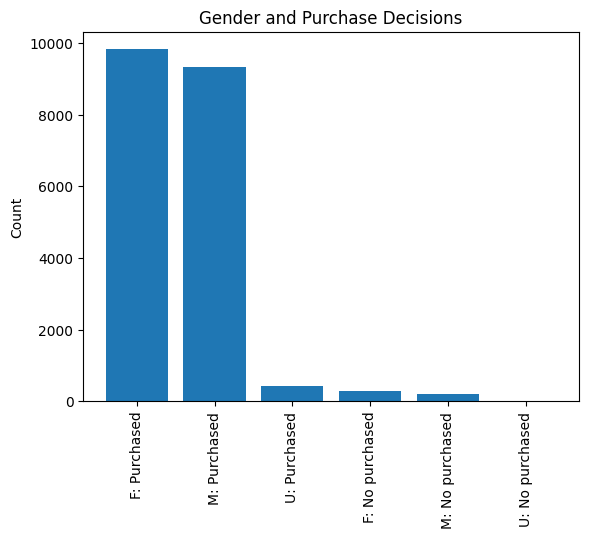

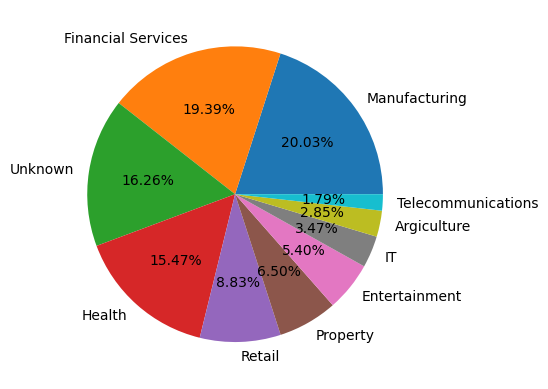

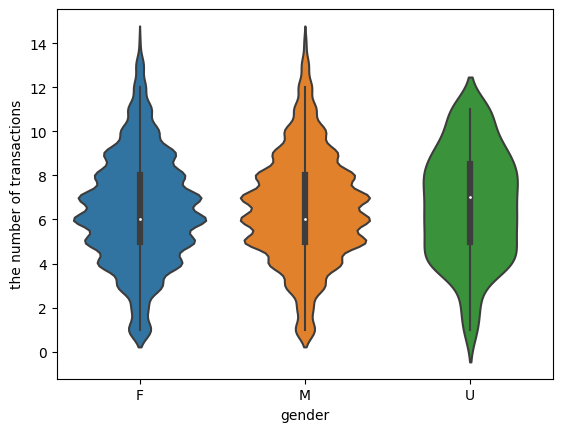

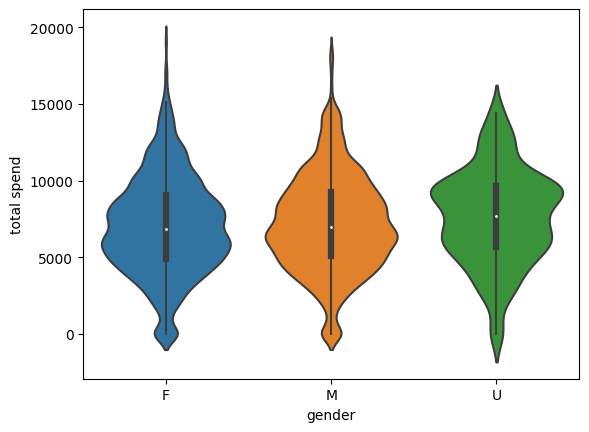

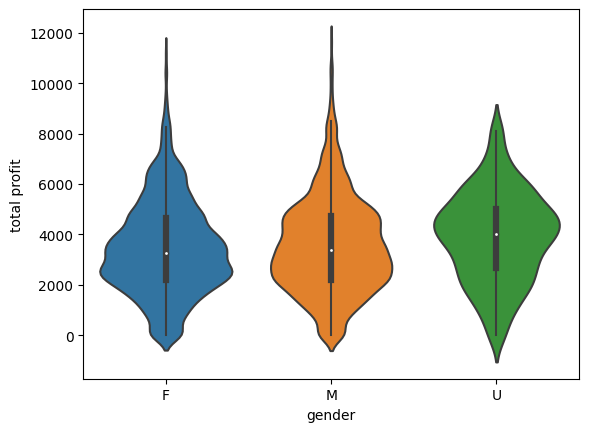

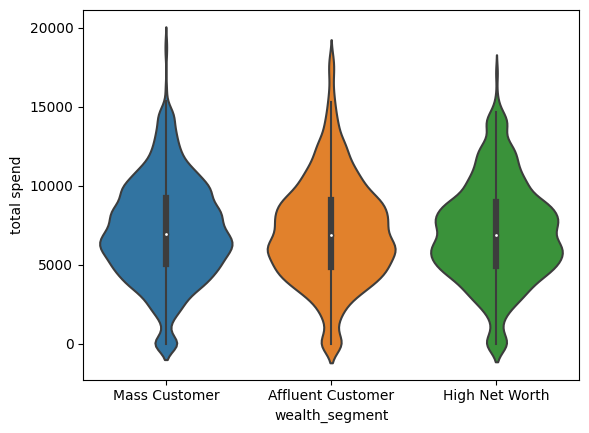

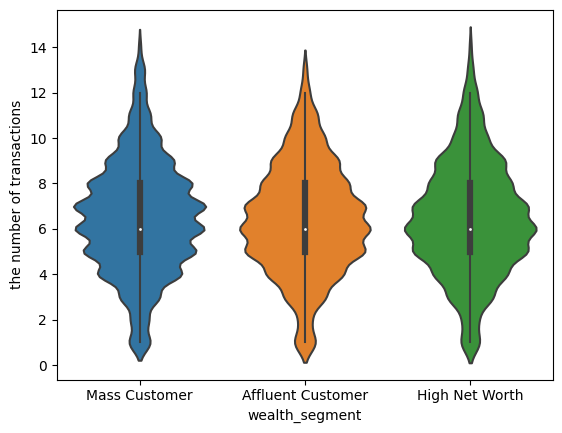

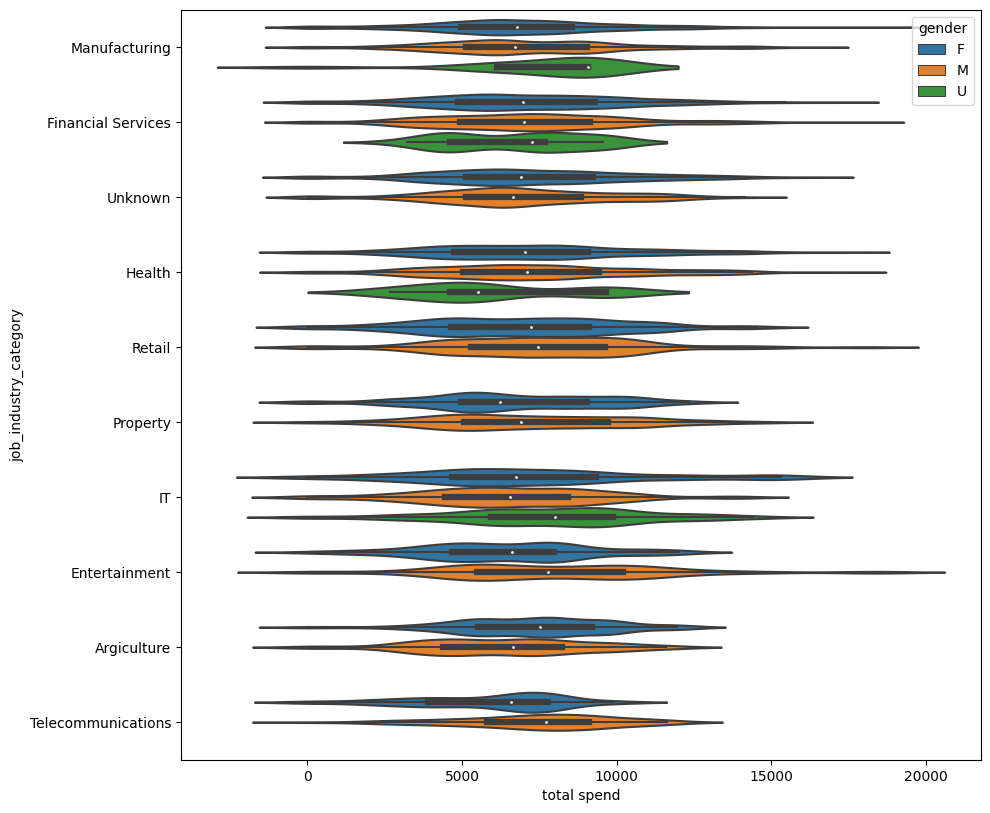

In [268]:
# draw some plots for data exploration
### purchased_or_not
combination_g_p_count = all_data_clean2.groupby(['gender', 'purchased_or_not']).size()
f_true_count = combination_g_p_count.loc[('F', True)]
f_false_count = combination_g_p_count.loc[('F', False)]
m_true_count = combination_g_p_count.loc[('M', True)]
m_false_count = combination_g_p_count.loc[('M', False)]
u_true_count = combination_g_p_count.loc[('U', True)]
u_false_count = combination_g_p_count.loc[('U', False)]
labels = ['F: Purchased', 'F: No purchased', 'M: Purchased',\
          'M: No purchased', 'U: Purchased', 'U: No purchased']
counts=[f_true_count, f_false_count, m_true_count, m_false_count,\
        u_true_count, u_false_count]
x_pos=np.arange(len(labels))
sorted_indices = np.argsort(counts)[::-1]
labels = [labels[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]
plt.bar(x_pos, counts, align='center')
plt.xticks(x_pos, labels, rotation='vertical')
plt.ylabel('Count')
plt.title('Gender and Purchase Decisions')
plt.show()

##job_industry_category
df_industry = all_data_clean2['job_industry_category'].value_counts()
p_labels = ['Manufacturing', 'Financial Services', 'Unknown', 'Health',\
            'Retail', 'Property', 'Entertainment', 'IT', 'Argiculture',\
            'Telecommunications'] #the descending order based on the value counts
plt.pie(df_industry, labels = p_labels, autopct='%0.2f%%')
plt.show()

sns.violinplot(data=all_data_clean2, x='gender', y='n_transactions')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('gender')
plt.ylabel('the number of transactions')
plt.show()

sns.violinplot(data=all_data_clean2, x='gender', y='total_spend')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('gender')
plt.ylabel('total spend')
plt.show()

sns.violinplot(data=all_data_clean2, x='gender', y='sum_profit')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('gender')
plt.ylabel('total profit')
plt.show()

sns.violinplot(data=all_data_clean2, x='wealth_segment', y='total_spend')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('wealth_segment')
plt.ylabel('total spend')
plt.show()

sns.violinplot(data=all_data_clean2, x='wealth_segment', y='n_transactions')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('wealth_segment')
plt.ylabel('the number of transactions')
plt.show()

plt.figure(figsize=(10,10))
order = df_industry.index
sns.violinplot(data=all_data_clean2, y='job_industry_category', x='total_spend', hue='gender', order=order)
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.ylabel('job_industry_category')
plt.xlabel('total spend')
plt.subplots_adjust(bottom=0.15, top=0.9,left=0.1, right=0.9)
plt.show()


